In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from common import *
from plotting import *

In [3]:
def filter_results(df, pattern) :
    return df.filter(regex=pattern, axis=0)

In [10]:
def get_results(data_name) :
    yr_df = []
    for v in [0.001, 0.01, 0.1, 10.0, 100.0, 1.0] :
        name = os.path.join('outputs/', data_name, 'baselines'+(('_' + str(v)) if v != 1.0 else ''))
        if os.path.exists(name) :
            dirs = os.listdir(name)
            dfs = {}
            for d in sorted(dirs) :
                dirname = os.path.join(name, d)
                if os.path.isdir(dirname) :
                    model_name = get_latest_model_with_test(dirname)
                    if model_name is not None :
                        df = json.load(open(os.path.join(model_name, 'test_evaluate.json')))
                        vals = {k:v for k, v in df.items()}
                        vals['model'] = d
                        vals['C'] = v
                        vals['type'] = d.split('+')[1]
                        vals['norm'] = d.split('+')[2].split('=')[1] if len(d.split('+')) > 2 else None
                        yr_df.append(vals)
    yr_df = pd.DataFrame(yr_df)
    print(len(yr_df))
    return yr_df

In [11]:
def generate_plot(data_name, key) :
    df = get_results(data_name)
    fig = sns.lineplot(x='C', y=key, hue='norm', style='type',  ci=None,
                 data=df[(df.type.isin(['BOW', 'BinaryBOW', 'TFIDF'])) & df.norm.isin(['None', 'l2'])])
    plt.xscale('log')
#     plt.title(data_name)
    sns.despine()
    fig.axes.get_legend().remove()
    fig.axes.set_ylabel(fig.axes.get_ylabel().replace('_', ' ').upper())
    fig.figure.savefig('Text-encoding-EHR/results/' + data_name + '/LR_Hyperparam.pdf', bbox_inches='tight')
    plt.show()
    return df

21


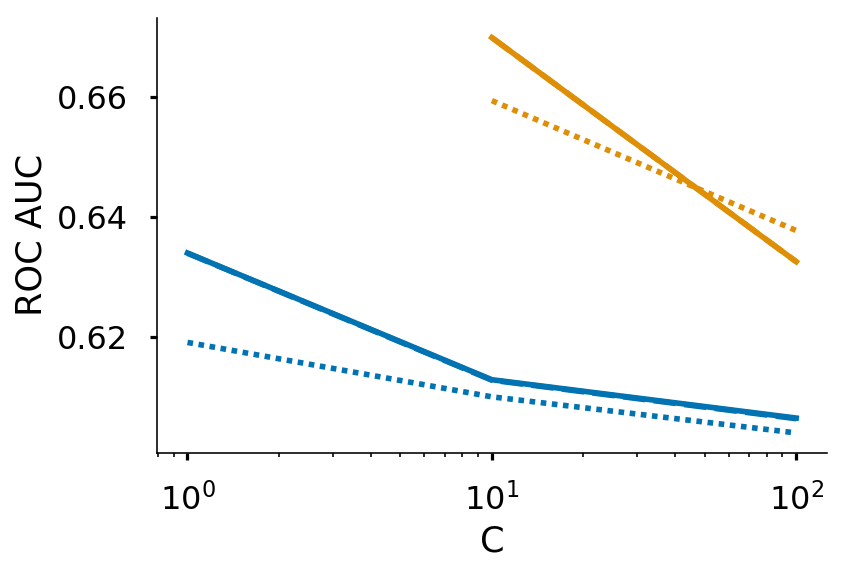

54


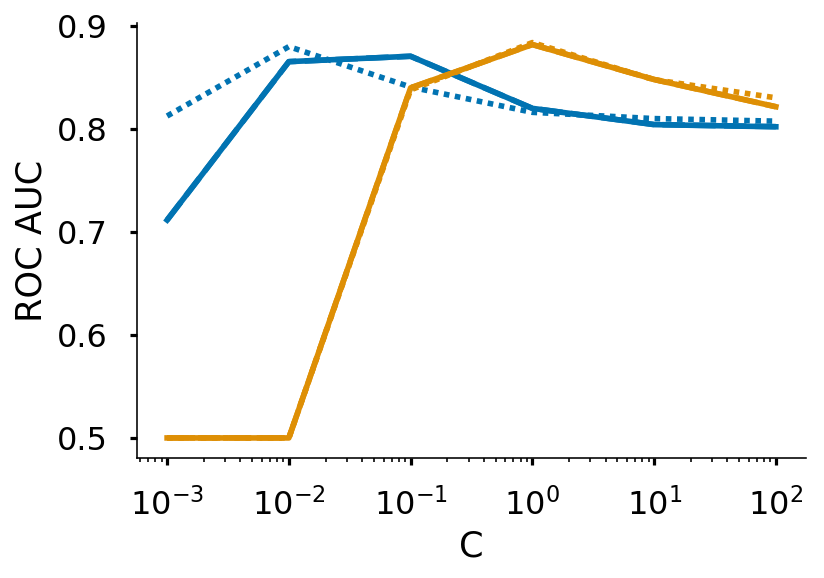

54


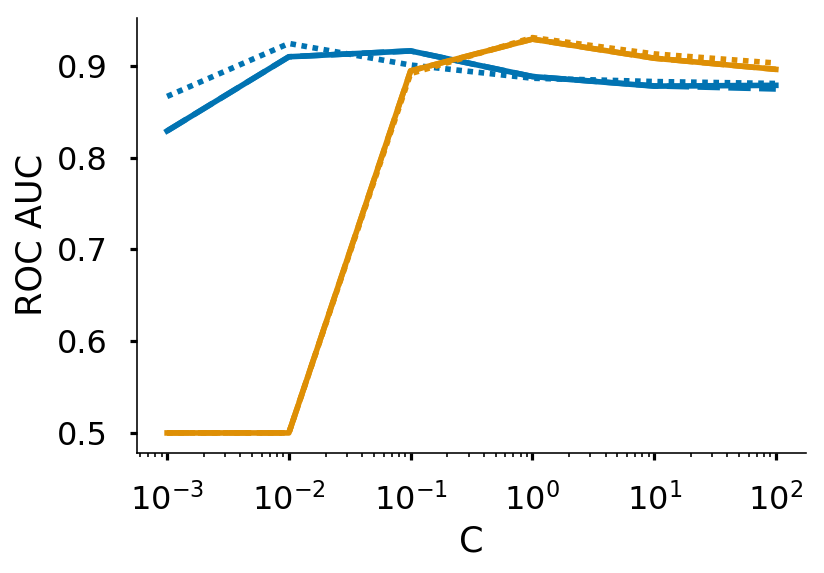

0


AttributeError: 'DataFrame' object has no attribute 'type'

In [12]:
df = generate_plot('Readmission', 'roc_auc')
df = generate_plot('Mortality_1yr', 'roc_auc')
df = generate_plot('Mortality_30day', 'roc_auc')
df = generate_plot('Diagnosis', 'macro_roc_auc')
df = generate_plot('HipSurgery_1', 'roc_auc')
df = generate_plot('KneeSurgery_1', 'roc_auc')

54


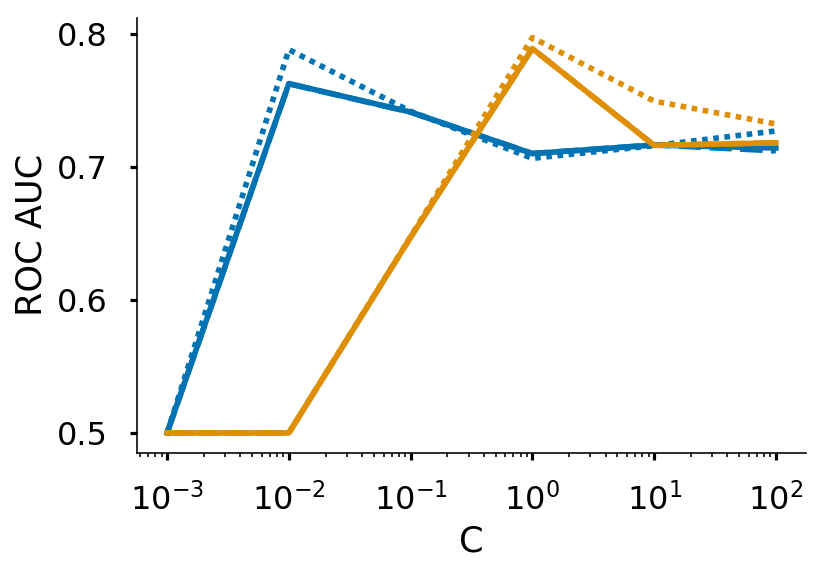

In [13]:
df = generate_plot('HipSurgery_1', 'roc_auc')

54


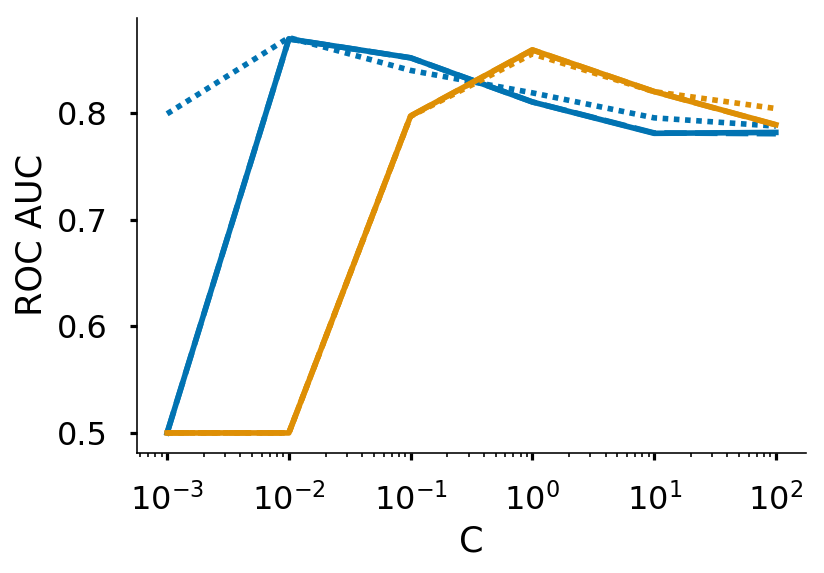

In [14]:
df = generate_plot('KneeSurgery_1', 'roc_auc')